Number of Testcases :- 8136..
Number of Attributes/Columns in data: 3

Attribute Information :-
1. TestcaseId.
2. TestCases.
3. Functionality.


Objective : Given a Testcases, determine whether the testcase is positive or negative. 


[Q].Why is solving this problem useful for your team?

Test manager can get idea of negative testing going or not and get idea of application working fine for negative testcases and can get idea of how many negative and positive testcases are covering.

[Q]Metric used

1.Precision :- Precision is a valid choice of evaluation metric when we want to be very sure of our prediction.

2.Recall :- Recall is a valid choice of evaluation metric when we want to capture as many positives as possible. 

[Q]what is Business impact of deploying these models.

Business manager can get idea of negative testing going or not and get idea of application working fine for negative testcases 

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os
import sys


C:\Users\hemant\AnacondaNew\lib\site-packages\smart_open\ssh.py:34: UserWarning: paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress
  warnings.warn('paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress')
C:\Users\hemant\AnacondaNew\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
df = pd.read_csv("G:\machine_learning\TestCases.csv",encoding="ISO-8859-1")   #read weather.csv data
df

,Test Case_ID,Test Case,Functionality
0,TC_1,Check user is able to click on login button,Positive
1,TC_2,Check whether MF and PMS tabs are displayed,Positive
2,TC_3,Check whether user is able to Click on MF|PMS ...,Positive
3,TC_4,check whether PMS is selected by default after...,Positive
4,TC_5,"Check whether user is able to see text ""Lets g...",Positive
...,...,...,...
8131,TC_8132,To verify if transaction date & time is given ...,Positive
8132,TC_8133,To verify if user is able to view the title as...,Positive
8133,TC_8134,To verify if user is able to view the followin...,Positive
8134,TC_8135,Check whether after order summary page user is...,Positive


In [3]:
print(df.shape)

(8136, 3)


# Exploratory Data Analysis

## Data Cleaning: Deduplication

In [4]:
#Deduplication of entries
final=df.drop_duplicates(subset={"Test Case_ID","Test Case","Functionality"}, keep='first', inplace=False)
final.shape

(8136, 3)

# Preprocessing

In [5]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [6]:
stopwords= set(['br', 'the', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"])

In [7]:
from tqdm import tqdm     
final_string=[]

for sentance in tqdm(df['Test Case'].values):
    sentance = re.sub(r"http\S+", "", sentance)
    #sentance = BeautifulSoup(sentance, 'lxml').get_text()
    sentance = decontracted(sentance)
    sentance = re.sub("\S*\d\S*", "", sentance).strip()
    sentance = re.sub('[^A-Za-z]+', ' ', sentance)
    sentance = ' '.join(e.lower() for e in sentance.split() if e.lower() not in stopwords)         
    final_string.append(sentance.strip())
    df['CleanedText']=pd.DataFrame(final_string)

100%|█████████████████████████████████████| 8136/8136 [00:25<00:00, 313.23it/s]


In [8]:
df

,Test Case_ID,Test Case,Functionality,CleanedText
0,TC_1,Check user is able to click on login button,Positive,check user able click login button
1,TC_2,Check whether MF and PMS tabs are displayed,Positive,check whether mf pms tabs displayed
2,TC_3,Check whether user is able to Click on MF|PMS ...,Positive,check whether user able click mf pms tabs
3,TC_4,check whether PMS is selected by default after...,Positive,check whether pms selected default clicking lo...
4,TC_5,"Check whether user is able to see text ""Lets g...",Positive,check whether user able see text lets get started
...,...,...,...,...
8131,TC_8132,To verify if transaction date & time is given ...,Positive,verify transaction date time given following f...
8132,TC_8133,To verify if user is able to view the title as...,Positive,verify user able view title order summary
8133,TC_8134,To verify if user is able to view the followin...,Positive,verify user able view following columns order ...
8134,TC_8135,Check whether after order summary page user is...,Positive,check whether order summary page user able logout


In [9]:
df['CleanedText'].shape

(8136,)

In [10]:
df['Functionality'].value_counts()

Positive    6917
Negative    1219
Name: Functionality, dtype: int64

In [11]:
df['Functionality'].replace({"Positive": 1, "Negative": 0}, inplace=True)

In [12]:
'''
# Separate majority and minority classes
df_majority = df[df.Functionality==1]
df_minority = df[df.Functionality==0]'''

'\n# Separate majority and minority classes\ndf_majority = df[df.Functionality==1]\ndf_minority = df[df.Functionality==0]'

In [13]:
"""
# Upsample minority class
from sklearn.utils import resample
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=1131,    # to match majority class
                                 random_state=223) # reproducible results
                                 """

'\n# Upsample minority class\nfrom sklearn.utils import resample\ndf_minority_upsampled = resample(df_minority, \n                                 replace=True,     # sample with replacement\n                                 n_samples=1131,    # to match majority class\n                                 random_state=223) # reproducible results\n                                 '

In [14]:
"""
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])"""

'\n# Combine majority class with upsampled minority class\ndf_upsampled = pd.concat([df_majority, df_minority_upsampled])'

In [15]:
"""
# Display new class counts
df_upsampled.Functionality.value_counts()
# 1    576
# 0    576
# Name: balance, dtype: int64"""

'\n# Display new class counts\ndf_upsampled.Functionality.value_counts()\n# 1    576\n# 0    576\n# Name: balance, dtype: int64'

In [16]:

"""
# Separate input features (X) and target variable (y)
y = df_upsampled.Functionality
 
"""

'\n# Separate input features (X) and target variable (y)\ny = df_upsampled.Functionality\n \n'

In [17]:
y = df['Functionality']


In [18]:
X = df.drop(['Functionality','Test Case','Test Case_ID'], axis=1)

In [19]:
X.shape

(8136, 1)

In [20]:
y.shape

(8136,)

In [21]:
from sklearn.model_selection import train_test_split

x_train, x_ts, y_train, y_ts = train_test_split(X, y, test_size=0.33) # this is random splitting

# Featurization

## BAG OF WORDS

In [22]:
#bi-gram, tri-gram and n-gram
from sklearn import preprocessing


#removing stop words like "not" should be avoided before building n-grams
# count_vect = CountVectorizer(ngram_range=(1,2))
# please do read the CountVectorizer documentation http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

# you can choose these numebrs min_df=10, max_features=5000, of your choice
count_vect = CountVectorizer(ngram_range=(1, 2),min_df=10) #in scikit-learn
x_tr_final_counts_bigram = count_vect.fit_transform(x_train['CleanedText'].values)
#x_cv_final_counts_bigram = count_vect.transform(x_cv['CleanedText'].values)
x_ts_final_counts_bigram = count_vect.transform(x_ts['CleanedText'].values)


print("the type of count vectorizer ",type(x_tr_final_counts_bigram))
print("the shape of out text BOW vectorizer ",x_tr_final_counts_bigram.get_shape())
print("the number of unique words ", x_tr_final_counts_bigram.get_shape()[1])

#print("the type of count vectorizer ",type(x_cv_final_counts_bigram))
#print("the shape of out text BOW vectorizer ",x_cv_final_counts_bigram.get_shape())
#print("the number of unique words ", x_cv_final_counts_bigram.get_shape()[1])

print("the type of count vectorizer ",type(x_ts_final_counts_bigram))
print("the shape of out text BOW vectorizer ",x_ts_final_counts_bigram.get_shape())
print("the number of unique words ", x_ts_final_counts_bigram.get_shape()[1])


x_tr_final_counts_bigram = preprocessing.normalize(x_tr_final_counts_bigram)
#x_cv_final_counts_bigram = preprocessing.normalize(x_cv_final_counts_bigram)
x_ts_final_counts_bigram = preprocessing.normalize(x_ts_final_counts_bigram)



the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BOW vectorizer  (5451, 911)
the number of unique words  911
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text BOW vectorizer  (2685, 911)
the number of unique words  911


## TF-IDF

In [23]:
tf_idf_vect = TfidfVectorizer(ngram_range=(1, 2),min_df=10)
x_tr_final_counts_tfidf = tf_idf_vect.fit_transform(x_train['CleanedText'].values)
#x_cv_final_counts_tfidf = tf_idf_vect.transform(x_cv['CleanedText'].values)
x_ts_final_counts_tfidf = tf_idf_vect.transform(x_ts['CleanedText'].values)


print("the type of count vectorizer ",type(x_tr_final_counts_tfidf))
print("the shape of out text TFIDF vectorizer ",x_tr_final_counts_tfidf.get_shape())
print("the number of unique words including both unigrams and bigrams ", x_tr_final_counts_tfidf.get_shape()[1])

#print("the type of count vectorizer ",type(x_cv_final_counts_tfidf))
#print("the shape of out text TFIDF vectorizer ",x_cv_final_counts_tfidf.get_shape())
#print("the number of unique words including both unigrams and bigrams ", x_cv_final_counts_tfidf.get_shape()[1])

print("the type of count vectorizer ",type(x_ts_final_counts_tfidf))
print("the shape of out text TFIDF vectorizer ",x_ts_final_counts_tfidf.get_shape())
print("the number of unique words including both unigrams and bigrams ", x_ts_final_counts_tfidf.get_shape()[1])


x_tr_final_counts_tfidf = preprocessing.normalize(x_tr_final_counts_tfidf)
#x_cv_final_counts_tfidf = preprocessing.normalize(x_cv_final_counts_tfidf)
x_ts_final_counts_tfidf = preprocessing.normalize(x_ts_final_counts_tfidf)



the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text TFIDF vectorizer  (5451, 911)
the number of unique words including both unigrams and bigrams  911
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text TFIDF vectorizer  (2685, 911)
the number of unique words including both unigrams and bigrams  911


## Word2Vec Train Data

In [24]:
# Train your own Word2Vec model using your own text corpus
i=0
list_of_sentance_train=[]
for sentance in x_train['CleanedText'].values:
    list_of_sentance_train.append(sentance.split())

In [25]:
# Train your own Word2Vec model using your own text corpus
i=0
list_of_sentance_ts=[]
for sentance in x_ts['CleanedText'].values:
    list_of_sentance_ts.append(sentance.split())

In [26]:
print(len(list_of_sentance_train))
#print(len(list_of_sentance_cv))
print(len(list_of_sentance_ts))

5451
2685


In [27]:
def convertByteStringtoString(sentlist):
    for x in sentlist:
        for i in range(len(x)):
            x[i] = x[i]
            
    return sentlist

In [28]:
list_of_sentance_train = convertByteStringtoString(list_of_sentance_train)
#list_of_sentance_cv = convertByteStringtoString(list_of_sentance_cv)
list_of_sentance_ts = convertByteStringtoString(list_of_sentance_ts)

In [29]:
# min_count = 5 considers only words that occured atleast 5 times
w2v_model=Word2Vec(list_of_sentance_train,min_count=5,size=50, workers=4)

In [30]:
w2v_words = list(w2v_model.wv.vocab)
print("number of words that occured minimum 5 times ",len(w2v_words))
print("sample words ", w2v_words[0:50])

number of words that occured minimum 5 times  554
sample words  ['select', 'nri', 'non', 'repatriable', 'individual', 'anyone', 'survivor', 'holding', 'type', 'check', 'whether', 'user', 'able', 'verify', 'enter', 'pass', 'date', 'dob', 'field', 'e', 'g', 'current', 'jan', 'enters', 'dd', 'mm', 'application', 'form', 'esign', 'view', 'mobile', 'number', 'see', 'content', 'checkbox', 'hereby', 'confirm', 'details', 'provided', 'motilal', 'oswal', 'asset', 'management', 'section', 'case', 'pmla', 'increase', 'no', 'installment', 'upi']


## Avg W2v

In [31]:
# average Word2Vec
# compute average word2vec for each review.

train_avgw2v = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sentance_train): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    train_avgw2v.append(sent_vec)
print(len(train_avgw2v))
print(len(train_avgw2v[0]))

100%|████████████████████████████████████| 5451/5451 [00:01<00:00, 4555.38it/s]

5451
50


In [32]:
test_avgw2v = []; # the avg-w2v for each sentence/review is stored in this list
for sent in tqdm(list_of_sentance_ts): # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length 50, you might need to change this to 300 if you use google's w2v
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
    if cnt_words != 0:
        sent_vec /= cnt_words
    test_avgw2v.append(sent_vec)
print(len(test_avgw2v))
print(len(test_avgw2v[0]))

100%|████████████████████████████████████| 2685/2685 [00:00<00:00, 4373.27it/s]

2685
50


In [33]:

train_avgw2v = preprocessing.normalize(train_avgw2v)
#cv_avgw2v = preprocessing.normalize(cv_avgw2v)
test_avgw2v = preprocessing.normalize(test_avgw2v)


In [34]:
train_avgw2v = np.array(train_avgw2v)
#cv_avgw2v = np.array(cv_avgw2v)
test_avgw2v = np.array(test_avgw2v)

## TFIDF weighted W2v

In [35]:
# S = ["abc def pqr", "def def def abc", "pqr pqr def"]
model = TfidfVectorizer()
x_tr_final_counts_TFIDF_w2v = model.fit_transform(x_train['CleanedText'].values)
#x_cv_final_counts_TFIDF_w2v = model.transform(x_cv['CleanedText'].values)
x_ts_final_counts_TFIDF_w2v = model.transform(x_ts['CleanedText'].values)

# we are converting a dictionary with word as a key, and the idf as a value
dictionary = dict(zip(model.get_feature_names(), list(model.idf_)))


In [36]:
# TF-IDF weighted Word2Vec Train Data
tfidf_feat = model.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_sent_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(list_of_sentance_train): # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words and word in tfidf_feat:
            vec = w2v_model.wv[word]
#             tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors.append(sent_vec)
    row += 1

100%|████████████████████████████████████| 5451/5451 [00:03<00:00, 1709.90it/s]


In [37]:
# TF-IDF weighted Word2Vec test Data
tfidf_feat = model.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_sent_vectors_ts = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in tqdm(list_of_sentance_ts): # for each review/sentence 
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        if word in w2v_words and word in tfidf_feat:
            vec = w2v_model.wv[word]
#             tf_idf = tf_idf_matrix[row, tfidf_feat.index(word)]
            # to reduce the computation we are 
            # dictionary[word] = idf value of word in whole courpus
            # sent.count(word) = tf valeus of word in this review
            tf_idf = dictionary[word]*(sent.count(word)/len(sent))
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
    if weight_sum != 0:
        sent_vec /= weight_sum
    tfidf_sent_vectors_ts.append(sent_vec)
    row += 1

100%|████████████████████████████████████| 2685/2685 [00:01<00:00, 1603.53it/s]


In [38]:

tfidf_sent_vectors = preprocessing.normalize(tfidf_sent_vectors)
#tfidf_sent_vectors_cv = preprocessing.normalize(tfidf_sent_vectors_cv)
tfidf_sent_vectors_ts = preprocessing.normalize(tfidf_sent_vectors_ts)


In [39]:
tfidf_sent_vectors = np.array(tfidf_sent_vectors)
#tfidf_sent_vectors_cv = np.array(tfidf_sent_vectors_cv)
tfidf_sent_vectors_ts = np.array(tfidf_sent_vectors_ts)

In [40]:
#To show how Time Series Split splits the data
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=10)
for train, cv in tscv.split(x_tr_final_counts_bigram):
    print("%s %s" % (train, cv))
#    print(x_tr_final_counts_bigram[train].shape,x_tr_final_counts_bigram[cv].shape)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

### Applying Logistic Regression with L1 regularization on BOW,<font color='red'> SET 1</font>

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\hemant\AnacondaNew\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\hemant\AnacondaNew\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\hemant\AnacondaNew\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  3.0min finished


Best C is:- 10.0


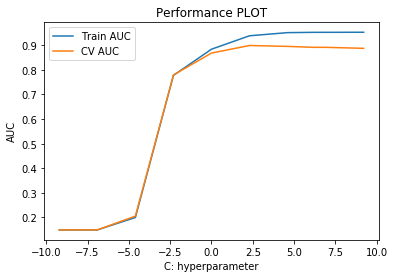

In [41]:
# Please write all the code with proper documentation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from math import log
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

alpha_values = np.arange(10)
C = np.array([0.0001,0.001,0.01,0.1,1,10,100,500,1000,10000])
cv_auc = []
train_auc = []


neigh = LogisticRegression(penalty='l1',solver='liblinear')
#params we need to try on classifier
param_grid = {'C':[0.0001,0.001,0.01,0.1,1,10,100,500,1000,10000],
             'penalty':['l1'],'class_weight':['balanced']} 
tscv = TimeSeriesSplit(n_splits=10) #For time based splitting
clf = RandomizedSearchCV(neigh,param_grid,cv=tscv,verbose=1,return_train_score=True)
clf.fit(x_tr_final_counts_bigram,y_train)


train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']



d = max(cv_auc)

i = np.where(cv_auc == d)

i = i[0][0]
best_alpha = float(C[i])
print("Best C is:-",best_alpha)     
    
    
C = np.log(C)    
    
plt.plot(C, train_auc, label='Train AUC')
plt.plot(C, cv_auc, label='CV AUC')
plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("Performance PLOT")
plt.show()

In [42]:
# LogisticRegression with best best "C" for l1 penalty of bow
model = LogisticRegression(penalty='l1',C = best_alpha,class_weight='balanced',solver='liblinear')
model.fit(x_tr_final_counts_bigram,y_train)
#pred = model.predict_proba(x_ts_final_counts_bigram)
pred=model.predict(x_ts_final_counts_bigram)    
    # evaluate CV AUC
auc_score_bowT_l1 = roc_auc_score(y_true=np.array(y_ts), y_score=model.predict_proba(x_ts_final_counts_bigram)[:,1])*100
auc_score_bowT_lambda_l1 = best_alpha
print('\nThe AUC of the Logistic Regression classifier of best C = %f is %f%%' % (best_alpha, auc_score_bowT_l1))    


The AUC of the Logistic Regression classifier of best C = 10.000000 is 95.623066%


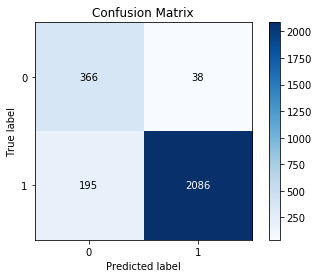

In [43]:
import scikitplot.metrics as skplt
skplt.plot_confusion_matrix(y_ts ,pred)


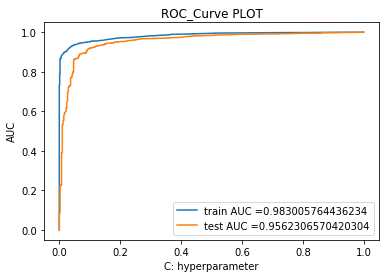

In [44]:
from sklearn.metrics import roc_curve, auc

train_fpr, train_tpr, thresholds = roc_curve(y_train, model.predict_proba(x_tr_final_counts_bigram)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_ts, model.predict_proba(x_ts_final_counts_bigram)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("ROC_Curve PLOT")
plt.show()




In [45]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_ts, pred))

              precision    recall  f1-score   support

           0       0.65      0.91      0.76       404
           1       0.98      0.91      0.95      2281

    accuracy                           0.91      2685
   macro avg       0.82      0.91      0.85      2685
weighted avg       0.93      0.91      0.92      2685



False Positive rate --> when it is actually -ve, how often does it predicted +ve = fp/actual-ve = 38/404 = .09

In [102]:
# FPR for bowt_l1
bowt_FPR_l1 = .09

### Applying Logistic Regression with L2 regularization on BOW,<font color='red'> SET 1</font>

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    8.0s finished


Best C is:- 100.0


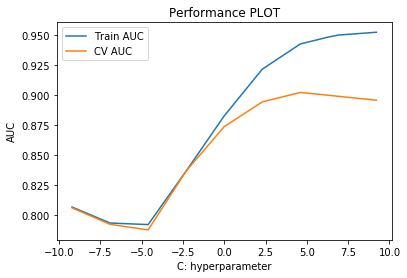

In [47]:
# Please write all the code with proper documentation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from math import log
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

alpha_values = np.arange(10)
C = np.array([0.0001,0.001,0.01,0.1,1,10,100,500,1000,10000])
cv_auc = []
train_auc = []


neigh = LogisticRegression(solver='liblinear')
#params we need to try on classifier
param_grid = {'C':[0.0001,0.001,0.01,0.1,1,10,100,500,1000,10000],
             'penalty':['l2'],'class_weight':['balanced']} 
tscv = TimeSeriesSplit(n_splits=10) #For time based splitting
clf = RandomizedSearchCV(neigh,param_grid,cv=tscv,verbose=1,return_train_score=True)
clf.fit(x_tr_final_counts_bigram,y_train)


train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']



d = max(cv_auc)

i = np.where(cv_auc == d)

i = i[0][0]
best_alpha = float(C[i])
print("Best C is:-",best_alpha)     
    
    
C = np.log(C)    
    
plt.plot(C, train_auc, label='Train AUC')
plt.plot(C, cv_auc, label='CV AUC')
plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("Performance PLOT")
plt.show()

In [48]:
# LogisticRegression with best best "C" for l2 penalty of bow
model = LogisticRegression(penalty='l2',C = best_alpha,class_weight='balanced')
model.fit(x_tr_final_counts_bigram,y_train)
#pred = model.predict_proba(x_ts_final_counts_bigram)
pred=model.predict(x_ts_final_counts_bigram)    
    # evaluate CV AUC
auc_score_bowT_l2 = roc_auc_score(y_true=np.array(y_ts), y_score=model.predict_proba(x_ts_final_counts_bigram)[:,1])*100
auc_score_bowT_lambda_l2 = best_alpha
print('\nThe AUC of the Logistic Regression classifier of best C = %f is %f%%' % (best_alpha, auc_score_bowT_l2))    


The AUC of the Logistic Regression classifier of best C = 100.000000 is 95.695880%


C:\Users\hemant\AnacondaNew\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


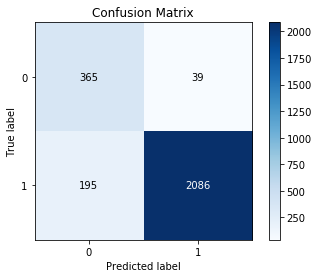

In [49]:
import scikitplot.metrics as skplt
skplt.plot_confusion_matrix(y_ts ,pred)


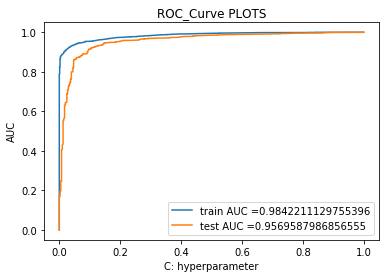

In [50]:
from sklearn.metrics import roc_curve, auc

train_fpr, train_tpr, thresholds = roc_curve(y_train, model.predict_proba(x_tr_final_counts_bigram)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_ts, model.predict_proba(x_ts_final_counts_bigram)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("ROC_Curve PLOTS")
plt.show()




In [51]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_ts, pred))

              precision    recall  f1-score   support

           0       0.65      0.90      0.76       404
           1       0.98      0.91      0.95      2281

    accuracy                           0.91      2685
   macro avg       0.82      0.91      0.85      2685
weighted avg       0.93      0.91      0.92      2685



False Positive rate --> when it is actually -ve, how often does it predicted +ve = fp/actual-ve = 39/404 = 0.09

In [94]:
# FPR for bowt_l2
bowt_FPR_l2 = .09

### Applying Logistic Regression with L1 regularization on TFIDF,<font color='red'> SET 2</font>

In [53]:
#To show how Time Series Split splits the data
from sklearn.model_selection import TimeSeriesSplit
tscv1 = TimeSeriesSplit(n_splits=10)
for train, cv in tscv1.split(x_tr_final_counts_tfidf):
    print("%s %s" % (train, cv))
#    print(x_tr_final_counts_bigram[train].shape,x_tr_final_counts_bigram[cv].shape)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.2min finished


Best C is:- 10.0


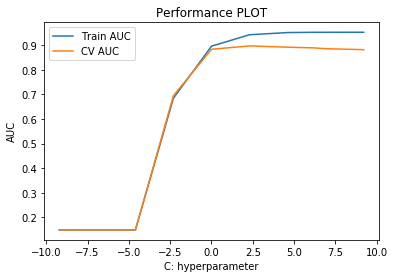

In [54]:
# Please write all the code with proper documentation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from math import log
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

alpha_values = np.arange(10)
C = np.array([0.0001,0.001,0.01,0.1,1,10,100,500,1000,10000])
cv_auc = []
train_auc = []


neigh = LogisticRegression(solver='liblinear')
#params we need to try on classifier
param_grid = {'C':[0.0001,0.001,0.01,0.1,1,10,100,500,1000,10000],
             'penalty':['l1'],'class_weight':['balanced']} 
tscv1 = TimeSeriesSplit(n_splits=10) #For time based splitting
clf = RandomizedSearchCV(neigh,param_grid,cv=tscv1,verbose=1,return_train_score=True)
clf.fit(x_tr_final_counts_tfidf,y_train)


train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']



d = max(cv_auc)

i = np.where(cv_auc == d)

i = i[0][0]
best_alpha = float(C[i])
print("Best C is:-",best_alpha)     
    
    
C = np.log(C)    
    
plt.plot(C, train_auc, label='Train AUC')
plt.plot(C, cv_auc, label='CV AUC')
plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("Performance PLOT")
plt.show()

In [55]:
# LogisticRegression with best best "C" for l1 penalty of bow
model = LogisticRegression(penalty='l1',C = best_alpha,solver='liblinear')
model.fit(x_tr_final_counts_tfidf,y_train)
#pred = model.predict_proba(x_ts_final_counts_bigram)
pred=model.predict(x_ts_final_counts_tfidf)    
    # evaluate CV AUC
auc_score_tfidf_l1 = roc_auc_score(y_true=np.array(y_ts), y_score=model.predict_proba(x_ts_final_counts_tfidf)[:,1])*100
auc_score_tfidf_lambda_l1 = best_alpha
print('\nThe AUC of the Logistic Regression classifier of best C = %f is %f%%' % (best_alpha, auc_score_tfidf_l1))    


The AUC of the Logistic Regression classifier of best C = 10.000000 is 95.285364%


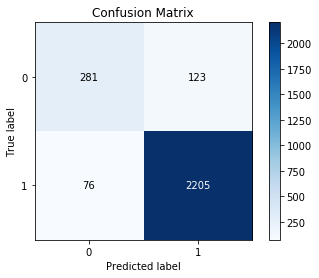

In [56]:
import scikitplot.metrics as skplt
skplt.plot_confusion_matrix(y_ts,pred)


In [57]:
print(classification_report(y_ts, pred))

              precision    recall  f1-score   support

           0       0.79      0.70      0.74       404
           1       0.95      0.97      0.96      2281

    accuracy                           0.93      2685
   macro avg       0.87      0.83      0.85      2685
weighted avg       0.92      0.93      0.92      2685



False Positive rate --> when it is actually -ve, how often does it predicted +ve = fp/actual-ve = 123/404 = 0.30

In [95]:
# FPR for tfidf_l1
tfidf_FPR_l1 = .30

### Applying Logistic Regression with L2 regularization on TFIDF,<font color='red'> SET 2</font>

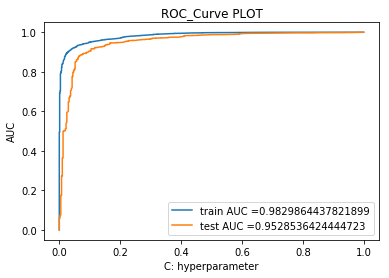

In [59]:
from sklearn.metrics import roc_curve, auc

train_fpr, train_tpr, thresholds = roc_curve(y_train, model.predict_proba(x_tr_final_counts_tfidf)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_ts, model.predict_proba(x_ts_final_counts_tfidf)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("ROC_Curve PLOT")
plt.show()




Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    8.7s finished


Best C is:- 100.0


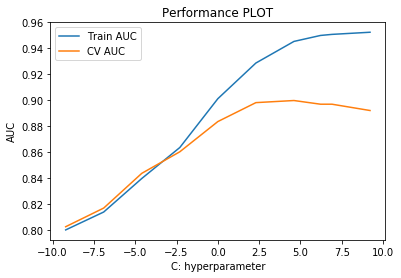

In [60]:
# Please write all the code with proper documentation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from math import log
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

alpha_values = np.arange(10)
C = np.array([0.0001,0.001,0.01,0.1,1,10,100,500,1000,10000])
cv_auc = []
train_auc = []


neigh = LogisticRegression(solver='liblinear')
#params we need to try on classifier
param_grid = {'C':[0.0001,0.001,0.01,0.1,1,10,100,500,1000,10000],
             'penalty':['l2'],'class_weight':['balanced']} 
tscv1 = TimeSeriesSplit(n_splits=10) #For time based splitting
clf = RandomizedSearchCV(neigh,param_grid,cv=tscv1,verbose=1,return_train_score=True)
clf.fit(x_tr_final_counts_tfidf,y_train)


train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']



d = max(cv_auc)

i = np.where(cv_auc == d)

i = i[0][0]
best_alpha = float(C[i])
print("Best C is:-",best_alpha)     
    
    
C = np.log(C)    
    
plt.plot(C, train_auc, label='Train AUC')
plt.plot(C, cv_auc, label='CV AUC')
plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("Performance PLOT")
plt.show()

In [61]:
# LogisticRegression with best best "C" for l2 penalty of bow
model = LogisticRegression(penalty='l2',C = best_alpha)
model.fit(x_tr_final_counts_tfidf,y_train)
#pred = model.predict_proba(x_ts_final_counts_bigram)
pred=model.predict(x_ts_final_counts_tfidf)    
    # evaluate CV AUC
auc_score_tfidf_l2 = roc_auc_score(y_true=np.array(y_ts), y_score=model.predict_proba(x_ts_final_counts_tfidf)[:,1])*100
auc_score_tfidf_lambda_l2 = best_alpha
print('\nThe AUC of the Logistic Regression classifier of best C = %f is %f%%' % (best_alpha, auc_score_tfidf_l2))    


The AUC of the Logistic Regression classifier of best C = 100.000000 is 95.326275%


C:\Users\hemant\AnacondaNew\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


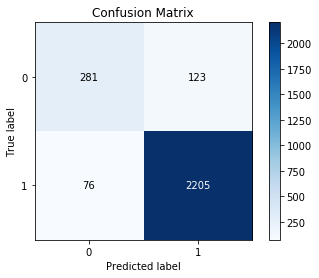

In [62]:
import scikitplot.metrics as skplt
skplt.plot_confusion_matrix(y_ts ,pred)

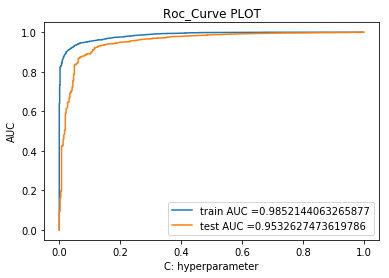

In [63]:
from sklearn.metrics import roc_curve, auc

train_fpr, train_tpr, thresholds = roc_curve(y_train, model.predict_proba(x_tr_final_counts_tfidf)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_ts, model.predict_proba(x_ts_final_counts_tfidf)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("Roc_Curve PLOT")
plt.show()



In [64]:
print(classification_report(y_ts, pred))

              precision    recall  f1-score   support

           0       0.79      0.70      0.74       404
           1       0.95      0.97      0.96      2281

    accuracy                           0.93      2685
   macro avg       0.87      0.83      0.85      2685
weighted avg       0.92      0.93      0.92      2685



False Positive rate --> when it is actually -ve, how often does it predicted +ve = fp/actual-ve = 123/404 = .30

In [96]:
# FPR for tfidf_l2
tfidf_FPR_l2 = .30

### Applying Logistic Regression with L1 regularization on AVG W2V<font color='red'> SET 3</font>

In [66]:
#To show how Time Series Split splits the data
from sklearn.model_selection import TimeSeriesSplit
tscv2 = TimeSeriesSplit(n_splits=10)
for train, cv in tscv1.split(train_avgw2v):
    print("%s %s" % (train, cv))
#    print(x_tr_final_counts_bigram[train].shape,x_tr_final_counts_bigram[cv].shape)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\hemant\AnacondaNew\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\hemant\AnacondaNew\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\hemant\AnacondaNew\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\hemant\AnacondaNew\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\hemant\AnacondaNew\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarn

C:\Users\hemant\AnacondaNew\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\hemant\AnacondaNew\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\hemant\AnacondaNew\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\hemant\AnacondaNew\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\hemant\AnacondaNew\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the numb

Best C is:- 100.0


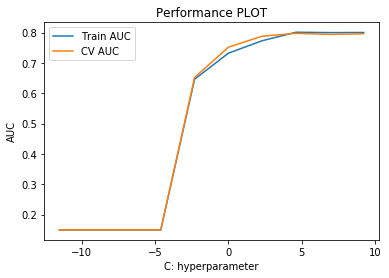

In [67]:
# Please write all the code with proper documentation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from math import log
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

alpha_values = np.arange(10)
C = np.array([0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000])
cv_auc = []
train_auc = []


neigh = LogisticRegression(solver='liblinear')
#params we need to try on classifier
param_grid = {'C':[0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000],
             'penalty':['l1'],'class_weight':['balanced']} 
tscv2 = TimeSeriesSplit(n_splits=10) #For time based splitting
clf = RandomizedSearchCV(neigh,param_grid,cv=tscv2,verbose=1,return_train_score=True)
clf.fit(train_avgw2v,y_train)


train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']



d = max(cv_auc)

i = np.where(cv_auc == d)

i = i[0][0]
best_alpha = float(C[i])
print("Best C is:-",best_alpha)     
    
    
C = np.log(C)    
    
plt.plot(C, train_auc, label='Train AUC')
plt.plot(C, cv_auc, label='CV AUC')
plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("Performance PLOT")
plt.show()

In [68]:
# LogisticRegression with best best "C" for l1 penalty of bow
model = LogisticRegression(penalty='l1',C = best_alpha,solver='liblinear')
model.fit(train_avgw2v,y_train)
#pred = model.predict_proba(x_ts_final_counts_bigram)
pred=model.predict(test_avgw2v)    
    # evaluate CV AUC
auc_score_word2vec_l1 = roc_auc_score(y_true=np.array(y_ts), y_score=model.predict_proba(test_avgw2v)[:,1])*100
auc_score_word2vec_lambda_l1 = best_alpha
print('\nThe AUC of the Logistic Regression classifier of best C = %f is %f%%' % (best_alpha, auc_score_word2vec_l1))    


The AUC of the Logistic Regression classifier of best C = 100.000000 is 89.449705%


C:\Users\hemant\AnacondaNew\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


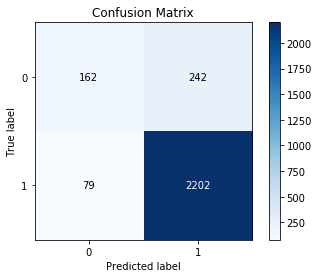

In [69]:
import scikitplot.metrics as skplt
skplt.plot_confusion_matrix(y_ts ,pred)

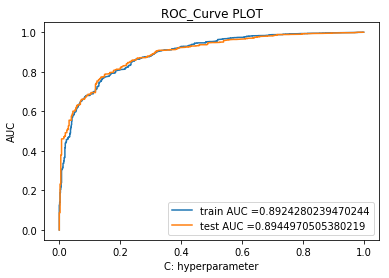

In [70]:
from sklearn.metrics import roc_curve, auc

train_fpr, train_tpr, thresholds = roc_curve(y_train, model.predict_proba(train_avgw2v)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_ts, model.predict_proba(test_avgw2v)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("ROC_Curve PLOT")
plt.show()



In [71]:
print(classification_report(y_ts, pred))

              precision    recall  f1-score   support

           0       0.67      0.40      0.50       404
           1       0.90      0.97      0.93      2281

    accuracy                           0.88      2685
   macro avg       0.79      0.68      0.72      2685
weighted avg       0.87      0.88      0.87      2685



False Positive rate --> when it is actually -ve, how often does it predicted +ve = fp/actual-ve = 242/404 = .59

In [97]:
# FPR for avgw2vec_l1
avgw2vec_FPR_l1 = .59

### Applying Logistic Regression with L2 regularization on AVG W2V,<font color='red'> SET 3</font>

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    7.8s finished


Best C is:- 1e-05


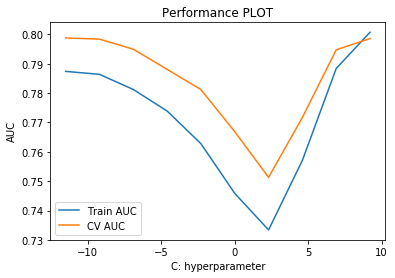

In [73]:
# Please write all the code with proper documentation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from math import log
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

alpha_values = np.arange(10)
C = np.array([0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000])
cv_auc = []
train_auc = []


neigh = LogisticRegression(solver='liblinear')
#params we need to try on classifier
param_grid = {'C':[0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000],
             'penalty':['l2'],'class_weight':['balanced']} 
tscv2 = TimeSeriesSplit(n_splits=10) #For time based splitting
clf = RandomizedSearchCV(neigh,param_grid,cv=tscv2,verbose=1,return_train_score=True)
clf.fit(train_avgw2v,y_train)


train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']



d = max(cv_auc)

i = np.where(cv_auc == d)

i = i[0][0]
best_alpha = float(C[i])
print("Best C is:-",best_alpha)     
    
    
C = np.log(C)    
    
plt.plot(C, train_auc, label='Train AUC')
plt.plot(C, cv_auc, label='CV AUC')
plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("Performance PLOT")
plt.show()

In [74]:
# LogisticRegression with best best "C" for l2 penalty of bow
model = LogisticRegression(penalty='l2',C = best_alpha,solver='liblinear')
model.fit(train_avgw2v,y_train)
#pred = model.predict_proba(x_ts_final_counts_bigram)
pred=model.predict(test_avgw2v)    
    # evaluate CV AUC
auc_score_word2vec_l2 = roc_auc_score(y_true=np.array(y_ts), y_score=model.predict_proba(test_avgw2v)[:,1])*100
auc_score_word2vec_lambda_l2 = best_alpha
print('\nThe AUC of the Logistic Regression classifier of best C = %f is %f%%' % (best_alpha, auc_score_word2vec_l2))    


The AUC of the Logistic Regression classifier of best C = 0.000010 is 69.250774%


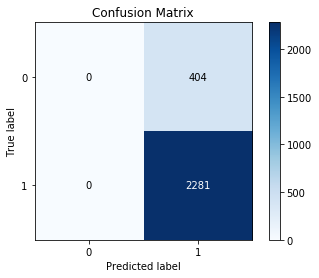

In [75]:
import scikitplot.metrics as skplt
skplt.plot_confusion_matrix(y_ts ,pred)

In [76]:
print(classification_report(y_ts, pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       404
           1       0.85      1.00      0.92      2281

    accuracy                           0.85      2685
   macro avg       0.42      0.50      0.46      2685
weighted avg       0.72      0.85      0.78      2685



C:\Users\hemant\AnacondaNew\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hemant\AnacondaNew\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hemant\AnacondaNew\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


False Positive rate --> when it is actually -ve, how often does it predicted +ve = fp/actual-ve = 404/404 = 1

In [98]:
# FPR for avgw2vec_l2
avgw2vec_FPR_l2 = 1

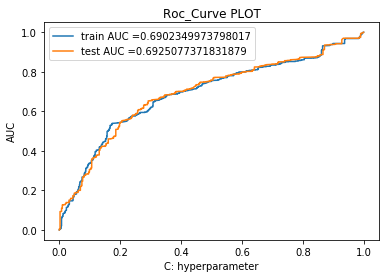

In [78]:
from sklearn.metrics import roc_curve, auc

train_fpr, train_tpr, thresholds = roc_curve(y_train, model.predict_proba(train_avgw2v)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_ts, model.predict_proba(test_avgw2v)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("Roc_Curve PLOT")
plt.show()



### Applying Logistic Regression with L1 regularization on TFIDF W2V,<font color='red'> SET 4</font>

In [79]:
#To show how Time Series Split splits the data
from sklearn.model_selection import TimeSeriesSplit
tscv3 = TimeSeriesSplit(n_splits=10)
for train, cv in tscv1.split(train_avgw2v):
    print("%s %s" % (train, cv))
#    print(x_tr_final_counts_bigram[train].shape,x_tr_final_counts_bigram[cv].shape)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\hemant\AnacondaNew\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\hemant\AnacondaNew\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\hemant\AnacondaNew\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\hemant\AnacondaNew\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\hemant\AnacondaNew\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarn

C:\Users\hemant\AnacondaNew\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\hemant\AnacondaNew\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\hemant\AnacondaNew\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\hemant\AnacondaNew\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\hemant\AnacondaNew\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the numb

Best C is:- 100.0


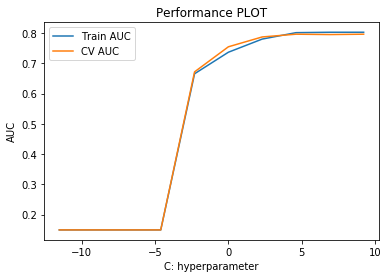

In [80]:
# Please write all the code with proper documentation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from math import log
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

alpha_values = np.arange(10)
C = np.array([0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000])
cv_auc = []
train_auc = []


neigh = LogisticRegression(solver='liblinear')
#params we need to try on classifier
param_grid = {'C':[0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000],
             'penalty':['l1'],'class_weight':['balanced']} 
tscv3 = TimeSeriesSplit(n_splits=10) #For time based splitting
clf = RandomizedSearchCV(neigh,param_grid,cv=tscv3,verbose=1,return_train_score=True)
clf.fit(tfidf_sent_vectors,y_train)


train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']



d = max(cv_auc)

i = np.where(cv_auc == d)

i = i[0][0]
best_alpha = float(C[i])
print("Best C is:-",best_alpha)     
    
    
C = np.log(C)    
    
plt.plot(C, train_auc, label='Train AUC')
plt.plot(C, cv_auc, label='CV AUC')
plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("Performance PLOT")
plt.show()

In [81]:
# LogisticRegression with best best "C" for l2 penalty of bow
model = LogisticRegression(penalty='l1',C = best_alpha,solver='liblinear')
model.fit(tfidf_sent_vectors,y_train)
#pred = model.predict_proba(x_ts_final_counts_bigram)
pred=model.predict(tfidf_sent_vectors_ts)    
    # evaluate CV AUC
auc_score_tfidf_word2vec_l1 = roc_auc_score(y_true=np.array(y_ts), y_score=model.predict_proba(tfidf_sent_vectors_ts)[:,1])*100
auc_score_tfidf_word2vec_lambda_l1 = best_alpha
print('\nThe AUC of the Logistic Regression classifier of best C = %f is %f%%' % (best_alpha, auc_score_tfidf_word2vec_l1))    


The AUC of the Logistic Regression classifier of best C = 100.000000 is 89.121173%


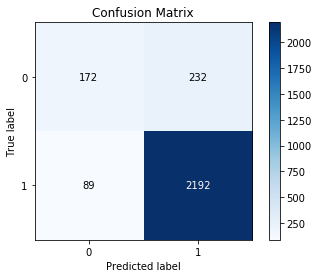

In [82]:
import scikitplot.metrics as skplt
skplt.plot_confusion_matrix(y_ts ,pred)

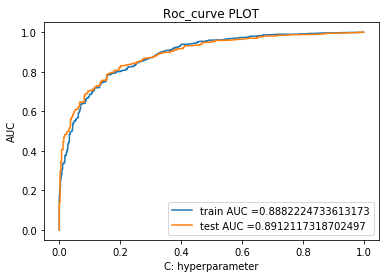

In [83]:
from sklearn.metrics import roc_curve, auc

train_fpr, train_tpr, thresholds = roc_curve(y_train, model.predict_proba(tfidf_sent_vectors)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_ts, model.predict_proba(tfidf_sent_vectors_ts)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("Roc_curve PLOT")
plt.show()



In [84]:
print(classification_report(y_ts, pred))

              precision    recall  f1-score   support

           0       0.66      0.43      0.52       404
           1       0.90      0.96      0.93      2281

    accuracy                           0.88      2685
   macro avg       0.78      0.69      0.72      2685
weighted avg       0.87      0.88      0.87      2685



False Positive rate --> when it is actually -ve, how often does it predicted +ve = fp/actual-ve = 232/404 = .57

In [99]:
# FPR for tfidf_w2vec_l1
tfidf_w2vec_FPR_l1 = .57

### Applying Logistic Regression with L2 regularization on TFIDF W2V,<font color='red'> SET 4</font>

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    8.6s finished


Best C is:- 10000.0


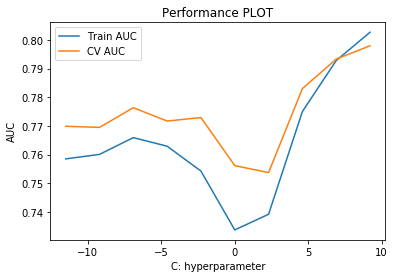

In [86]:
# Please write all the code with proper documentation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from math import log
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

alpha_values = np.arange(10)
C = np.array([0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000])
cv_auc = []
train_auc = []


neigh = LogisticRegression(solver='liblinear')
#params we need to try on classifier
param_grid = {'C':[0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000],
             'penalty':['l2'],'class_weight':['balanced']} 
tscv3 = TimeSeriesSplit(n_splits=10) #For time based splitting
clf = RandomizedSearchCV(neigh,param_grid,cv=tscv3,verbose=1,return_train_score=True)
clf.fit(tfidf_sent_vectors,y_train)


train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']



d = max(cv_auc)

i = np.where(cv_auc == d)

i = i[0][0]
best_alpha = float(C[i])
print("Best C is:-",best_alpha)     
    
    
C = np.log(C)    
    
plt.plot(C, train_auc, label='Train AUC')
plt.plot(C, cv_auc, label='CV AUC')
plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("Performance PLOT")
plt.show()

In [87]:
# LogisticRegression with best best "C" for l2 penalty of bow
model = LogisticRegression(penalty='l2',C = best_alpha,solver='liblinear')
model.fit(tfidf_sent_vectors,y_train)
#pred = model.predict_proba(x_ts_final_counts_bigram)
pred=model.predict(tfidf_sent_vectors_ts)    
    # evaluate CV AUC
auc_score_tfidf_word2vec_l2 = roc_auc_score(y_true=np.array(y_ts), y_score=model.predict_proba(tfidf_sent_vectors_ts)[:,1])*100
auc_score_tfidf_word2vec_lambda_l2 = best_alpha
print('\nThe AUC of the Logistic Regression classifier of best C = %f is %f%%' % (best_alpha, auc_score_tfidf_word2vec_l2))    


The AUC of the Logistic Regression classifier of best C = 10000.000000 is 89.083193%


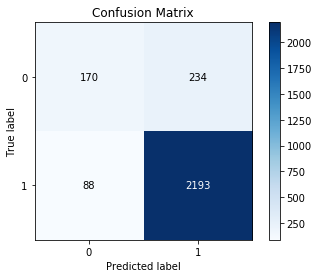

In [88]:
import scikitplot.metrics as skplt
skplt.plot_confusion_matrix(y_ts ,pred)

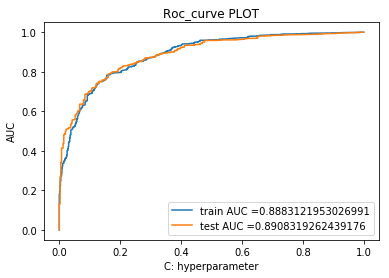

In [89]:
from sklearn.metrics import roc_curve, auc

train_fpr, train_tpr, thresholds = roc_curve(y_train, model.predict_proba(tfidf_sent_vectors)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_ts, model.predict_proba(tfidf_sent_vectors_ts)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("C: hyperparameter")
plt.ylabel("AUC")
plt.title("Roc_curve PLOT")
plt.show()



In [90]:
print(classification_report(y_ts, pred))

              precision    recall  f1-score   support

           0       0.66      0.42      0.51       404
           1       0.90      0.96      0.93      2281

    accuracy                           0.88      2685
   macro avg       0.78      0.69      0.72      2685
weighted avg       0.87      0.88      0.87      2685



False Positive rate --> when it is actually -ve, how often does it predicted +ve = fp/actual-ve = 234/404 = .57

In [100]:
# FPR for tfidf_w2vec_l2
tfidf_w2vec_FPR_l2 = .57

# Conclusions

In [103]:
# Please compare all your models using Prettytable library
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Vectorizer","penalty","hyperparameter(C)","roc_auc_score","FPR"]
x.add_row(["BOW","L1",auc_score_bowT_lambda_l1,auc_score_bowT_l1,bowt_FPR_l1])
x.add_row(["BOW","L2",auc_score_bowT_lambda_l2,auc_score_bowT_l2,bowt_FPR_l2])
x.add_row(["TF-IDF","L1",auc_score_tfidf_lambda_l1,auc_score_tfidf_l1,tfidf_FPR_l1])
x.add_row(["TF-IDF","L2",auc_score_tfidf_lambda_l2,auc_score_tfidf_l2,tfidf_FPR_l2])
x.add_row(["AVG -W2V","L1",auc_score_word2vec_lambda_l1,auc_score_word2vec_l1,avgw2vec_FPR_l1])
x.add_row(["AVG -W2V","L2",auc_score_word2vec_lambda_l2,auc_score_word2vec_l2,avgw2vec_FPR_l2])
x.add_row(["TFIDF-W2V","L1",auc_score_tfidf_word2vec_lambda_l1,auc_score_tfidf_word2vec_l1,tfidf_w2vec_FPR_l1])
x.add_row(["TFIDF-W2V","L2",auc_score_tfidf_word2vec_lambda_l2,auc_score_tfidf_word2vec_l2,tfidf_w2vec_FPR_l2])


print(x)

+------------+---------+-------------------+-------------------+------+
| Vectorizer | penalty | hyperparameter(C) |   roc_auc_score   | FPR  |
+------------+---------+-------------------+-------------------+------+
|    BOW     |    L1   |        10.0       | 95.62306570420304 | 0.09 |
|    BOW     |    L2   |       100.0       | 95.69587986856554 | 0.09 |
|   TF-IDF   |    L1   |        10.0       | 95.28536424444724 | 0.3  |
|   TF-IDF   |    L2   |       100.0       | 95.32627473619786 | 0.3  |
|  AVG -W2V  |    L1   |       100.0       | 89.44970505380219 | 0.59 |
|  AVG -W2V  |    L2   |       1e-05       |  69.2507737183188 |  1   |
| TFIDF-W2V  |    L1   |       100.0       | 89.12117318702497 | 0.57 |
| TFIDF-W2V  |    L2   |      10000.0      | 89.08319262439176 | 0.57 |
+------------+---------+-------------------+-------------------+------+


as per the table, we can consider BOW with L2 regularizor because it has less false positive rate and more roc_auc_score

